In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from collections import namedtuple
from IPython.display import display

In [2]:
df = pd.read_csv("IMDb Movies India.csv.zip", encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df['Genre'].nunique()

485

In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
df['Year'].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [7]:
df.Rating.unique()

array([ nan,  7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,
        6.3,  7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,
        4.8,  8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  7.6,  3.1,  3.3,  7.8,
        8.4,  5.2,  4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  5.4,  4.2,
        5.3,  3.4,  3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  3.7,
        3.2,  2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,
        2.3,  8.5,  8.6,  9. ,  9.6,  1.7,  9.1,  2. ,  1.4,  8.9,  1.9,
        9.4,  9.7,  1.8,  9.2,  1.6, 10. ,  2.2,  1.1])

In [8]:
df['Duration'].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [9]:
df.groupby(['Genre']).count()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Genre,,,,,,,,,
Action,1289,1265,262,417,417,1249,1207,1124,1005
"Action, Adventure",41,41,17,24,24,41,40,39,39
"Action, Adventure, Biography",1,1,1,1,1,1,1,1,1
"Action, Adventure, Comedy",42,41,37,40,40,42,42,42,42
"Action, Adventure, Crime",19,19,11,16,16,19,19,19,19
...,...,...,...,...,...,...,...,...,...
"Thriller, Action",2,2,1,1,1,2,2,2,2
"Thriller, Musical, Mystery",1,1,1,1,1,1,1,1,1
"Thriller, Mystery",3,3,2,3,3,3,3,3,3


In [10]:
df["Director"].value_counts().head(6)

Jayant Desai       58
Kanti Shah         57
Babubhai Mistry    50
Mahesh Bhatt       48
Master Bhagwan     47
Nanabhai Bhatt     46
Name: Director, dtype: int64

In [11]:
df.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [12]:
df.any()

Name        True
Year        True
Duration    True
Genre       True
Rating      True
Votes       True
Director    True
Actor 1     True
Actor 2     True
Actor 3     True
dtype: bool

In [13]:
df['Duration'] = df['Duration'].str.replace('min', '').apply(pd.to_numeric)
df["Votes"] = df["Votes"].replace("$5.16M", 516)
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',', ''))

df.dropna(subset=['Year'], inplace=True)
df.dropna(subset=['Genre'], inplace=True)

df['Rating'].fillna(df['Rating'].mode().max(), inplace=True)
df['Duration'].fillna(df['Duration'].mean(), inplace=True)
df['Votes'].fillna(df['Votes'].mean(), inplace=True)
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

In [14]:
print('Null Values in Year Column',df['Year'].isnull().sum())
print('Null Values in Genre Column',df['Genre'].isnull().sum())

Null Values in Year Column 0
Null Values in Genre Column 0


In [15]:
def Talents(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [16]:
def Histo(column):
    global df
    plt.figure(figsize=(20,6))
    plt.hist(df[column], edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [17]:
def Scatter(x, y, c=None):
    global df
    plt.figure(figsize=(20,6))
    plt.scatter(df[x], df[y], edgecolor="k", c=c)
    plt.xticks(rotation=0)
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()   

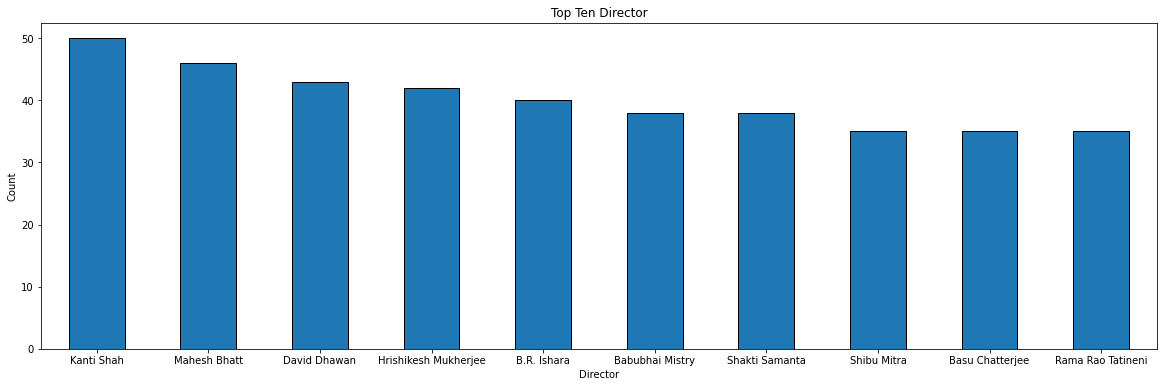

In [19]:
Talents("Director")

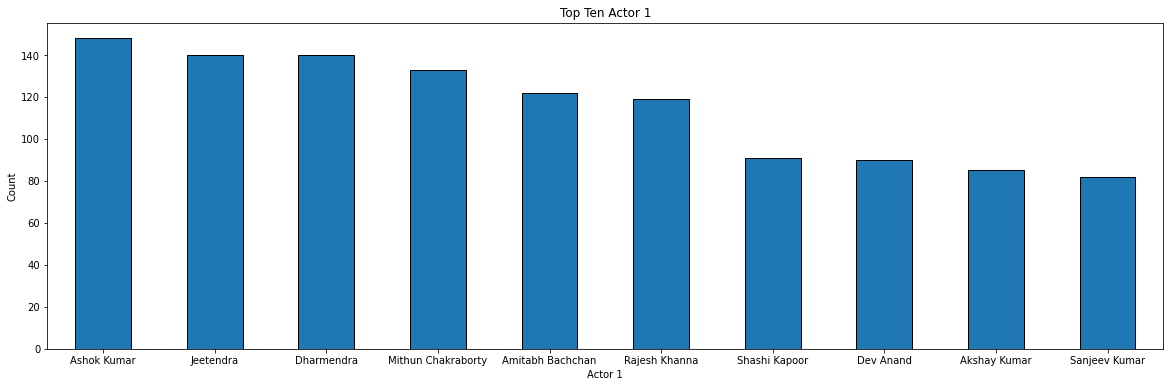

In [20]:
Talents("Actor 1")

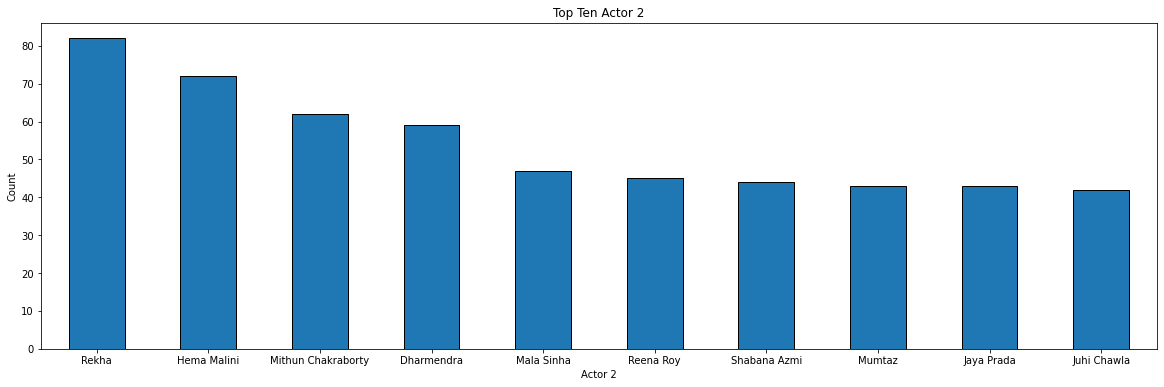

In [21]:
Talents("Actor 2")

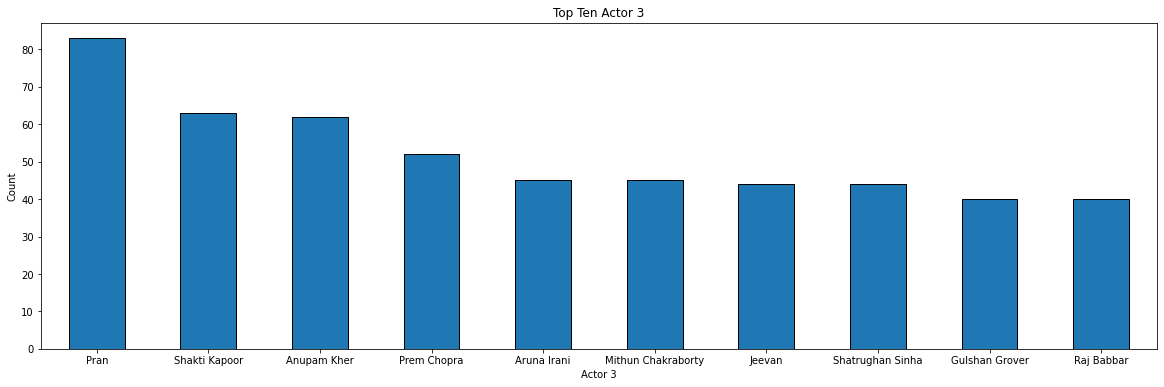

In [22]:
Talents("Actor 3")

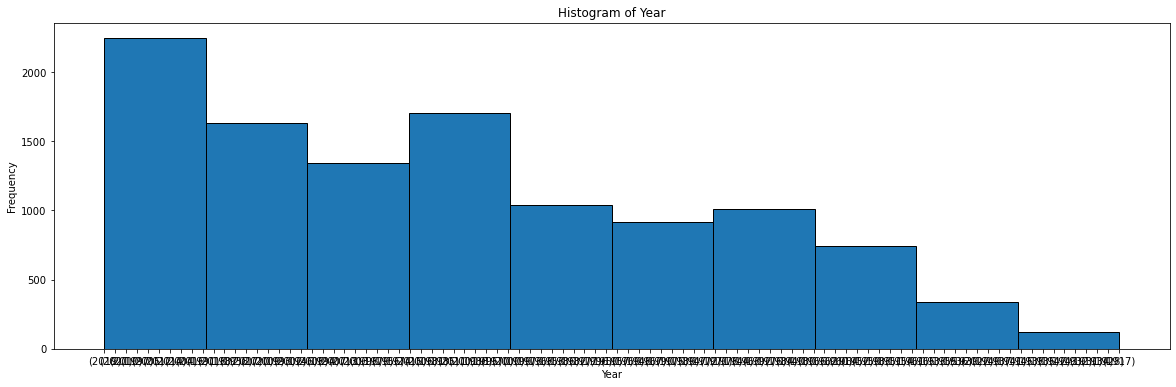

In [23]:
Histo("Year")

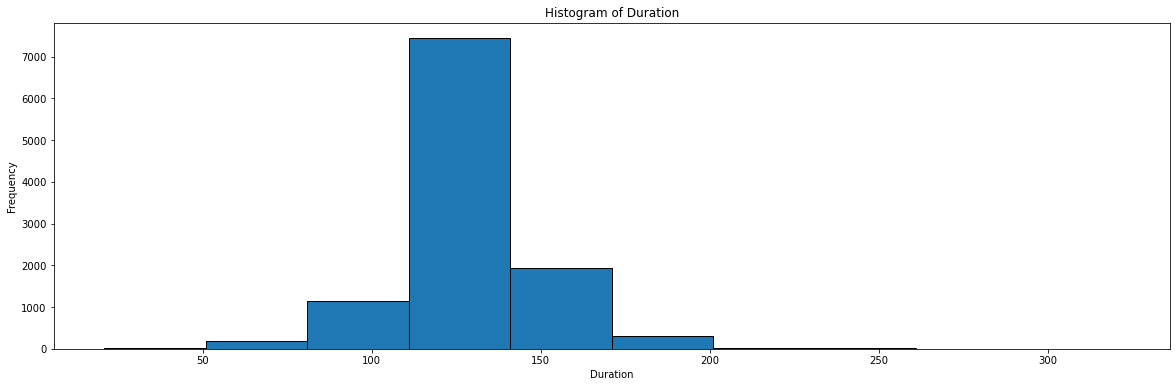

In [24]:
Histo("Duration")

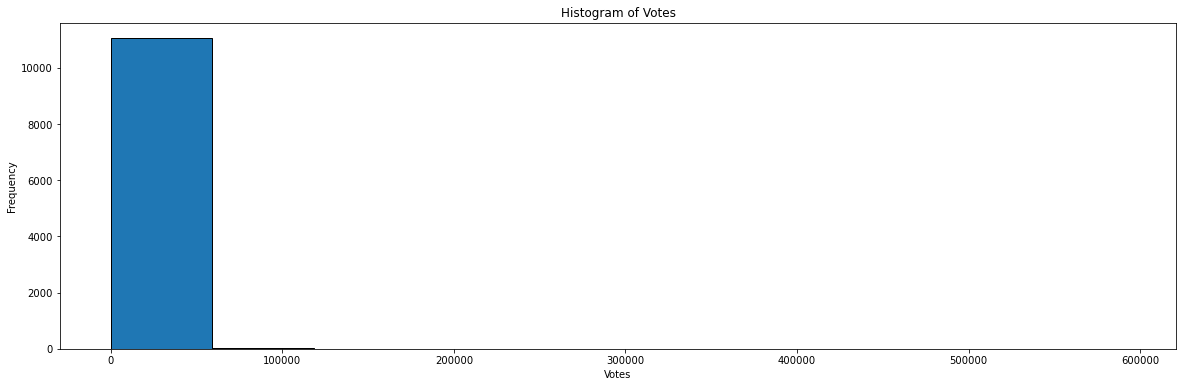

In [25]:
Histo("Votes")

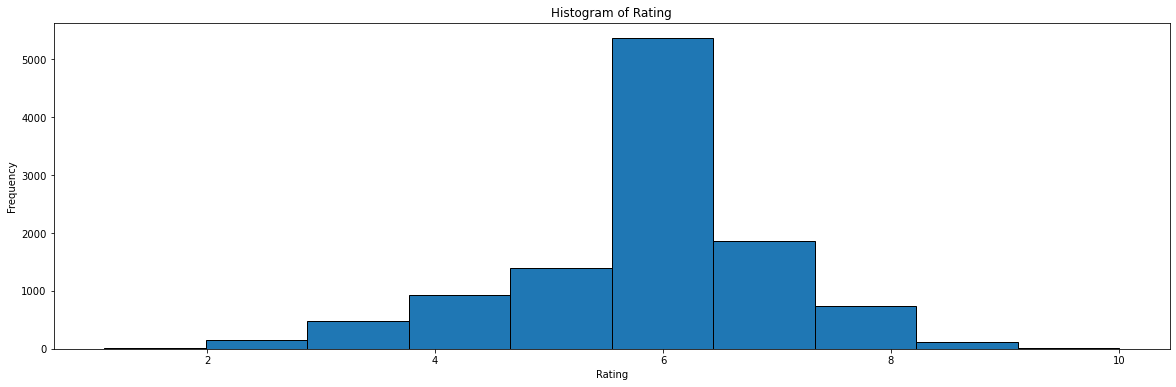

In [26]:
Histo("Rating")

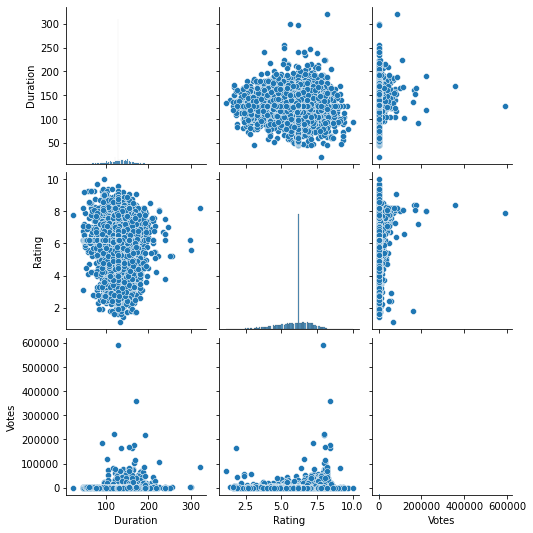

In [27]:
import seaborn as sns

sns.pairplot(df)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr(method='spearman')

In [28]:
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_columns)

Index(['Name', 'Year', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')


In [29]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr(method='spearman')
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [30]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)
(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [31]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)

In [34]:
actor1_encoding_map = df.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()['Rating']
actor2_encoding_map = df.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()['Rating']
actor3_encoding_map = df.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()['Rating']
director_encoding_map = df.groupby('Director').agg({'Rating': 'mean'}).to_dict()['Rating']
genre_encoding_map = df.groupby('Genre').agg({'Rating': 'mean'}).to_dict()['Rating']

In [35]:
df['actor1_encoded'] = round(df['Actor 1'].map(actor1_encoding_map), 1)
df['actor2_encoded'] = round(df['Actor 2'].map(actor2_encoding_map), 1)
df['actor3_encoded'] = round(df['Actor 3'].map(actor3_encoding_map), 1)
df['director_encoded'] = round(df['Director'].map(director_encoding_map), 1)
df['genre_encoded'] = round(df['Genre'].map(genre_encoding_map), 1)

In [36]:
df.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)

In [37]:
X = df[['Year', 'Duration', 'Votes', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']]
y = df['Rating']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [40]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [41]:
print('Linear Regression Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))
print('R2 Score:', r2_score(y_test, lr_pred))

Linear Regression Metrics:
Mean Squared Error: 0.36662604478335065
Mean Absolute Error: 0.4299825006345652
R2 Score: 0.7225086563365912


In [42]:
print('\nRandom Forest Regressor Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))


Random Forest Regressor Metrics:
Mean Squared Error: 0.2642443259693417
Mean Absolute Error: 0.3030293056807983
R2 Score: 0.7999991705117555


In [43]:
import matplotlib.pyplot as plt

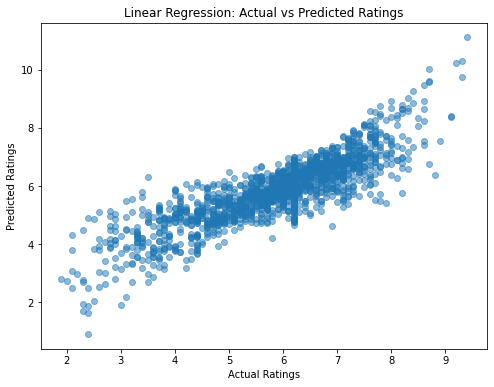

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

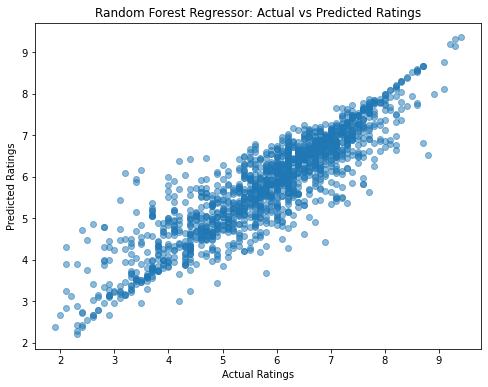

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()